In [38]:
import os
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [39]:
## Calculate summed MSEs for all timesteps for selection of alphas

# Get current usage
usage = Image.open('../assets/wales_current_welsh_usage.tif')
usage = np.array(usage) * 0.01
usage = np.flip(usage, axis=0)

usage_mask = Image.open("../assets/wales_current_usage_mask.tif")
usage_mask = np.array(usage_mask).astype(bool)
usage_mask = np.flip(usage_mask, axis=0)
usage[~usage_mask] = np.nan

freq_mask = Image.open("../assets/wales_country_mask_tif.tif")
freq_mask = np.array(freq_mask).astype(bool)
freq_mask = np.flip(freq_mask, axis=0)
mask_shape = freq_mask.shape

total_diffs = []
ax_num = 0
all_nums = []
alphas = [1.2, 1.7, 2.3, 2.5]

print("started")
for alpha in alphas:
    
    # Load data and get timestamps from filenames
    names = os.listdir(f'../simulation_data/walesICbook5Alpha{alpha}Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0')
    nums = [name.split('_')[-1].replace('.npy','') for name in names]
    nums = np.array(nums).astype(int)
    nums = np.array(sorted(nums))[:len(nums)//2]
    ks=nums
    all_nums.append(nums)
    
    # Calculate summed MSE
    alpha_diffs = []
    for i, k in enumerate(ks):
        print(f'{i} out of {len(nums)} completed', end = '\r')

        freq = np.load(f"../simulation_data/walesICbook5Alpha{alpha}Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0/walesICbook5Alpha{alpha}Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0MEMORY_0_{k}.npy")
        freq = freq[:mask_shape[0], :mask_shape[1]]
        freq[~freq_mask] = np.nan

        usage = usage/(np.nanmax(usage))
        diff = (usage - freq)**2
        total_diff = np.nansum(diff)
        alpha_diffs.append(total_diff)

    total_diffs.append(alpha_diffs)

started


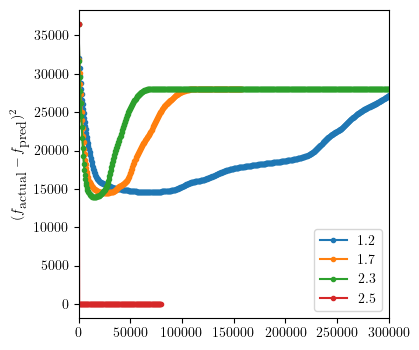

In [40]:
# Plot diffs for the alphas used

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

plt.figure(figsize=(4,4))

for i, alpha in enumerate(alphas):
    plt.plot(all_nums[i], total_diffs[i], marker=".", label=alphas[i])

plt.ylabel(r"$(f_\textrm{actual} - f_\textrm{pred})^2$")
plt.xlim(0,300000)
plt.legend()
plt.show()

In [41]:
# Get index of min MSE^2 (alpha=2.5 is non-physical)

min_ind = np.argmin(total_diffs[2])
min_ind_timestamp = all_nums[2][min_ind]
min_ind_timestamp

15000

In [42]:
final_val = total_diffs[2][-1]

# Get 99.9% value as there is a prolonged plateau
nine_nine_nine_of_final = 0.999*final_val

indexes_greater = total_diffs[2]>nine_nine_nine_of_final
indexes_greater_flipped = list(reversed(indexes_greater))

first_index = indexes_greater_flipped.index(False)
actual_first_index_greater = len(total_diffs[2])-first_index
print(actual_first_index_greater)

140


In [43]:
print(total_diffs[2][first_index-5:first_index+5])

[28048.796475090465, 28048.796475090465, 28048.796475090465, 28048.79647509047, 28048.79647509047, 28048.796475090476, 28048.796475090476, 28048.796475090476, 28048.796475090476, 28048.796475090476]


In [44]:
all_nums[2][140]

70000

In [45]:
# 15000 is 2011
# When is 70000?
f = (2011-1850)/15000
1850+70000*f

2601.333333333333

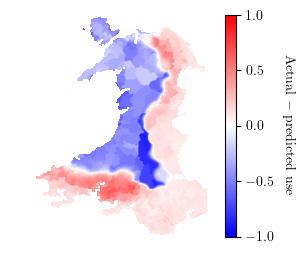

In [6]:
usage = Image.open('../assets/wales_current_welsh_usage.tif')
usage = np.array(usage) * 0.01
usage = np.flip(usage, axis=0)

freq_mask = Image.open("../assets/wales_country_mask_tif.tif")
freq_mask = np.array(freq_mask).astype(bool)
freq_mask = np.flip(freq_mask, axis=0)
mask_shape = freq_mask.shape

k=15000
freq = np.load(f"../simulation_data/walesICbook5Alpha2.3Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0_0/walesICbook5Alpha2.3Beta1.1SigmavarFactor2Deltat0.0004Tmax500.0MEMORY_0_{k}.npy")
    
freq = freq[:mask_shape[0], :mask_shape[1]]
freq[~freq_mask] = np.nan

diff = usage - freq
total_diff = np.nansum(diff)

# Plot 'residuals'
fig, ax = plt.subplots()
plt.imshow(diff, origin="lower", cmap='bwr', vmin=-1.0, vmax=1.0)
cb = plt.colorbar()
cb.set_label("Actual $-$ predicted use", rotation=270, labelpad=15)
ax.axis("off")
s = fig.get_size_inches()
fig.set_size_inches(float(s[0])*0.6, float(s[1])*0.6)
# plt.savefig("wales_residuals_2.3_15000.pdf", bbox_inches="tight")
plt.show()
